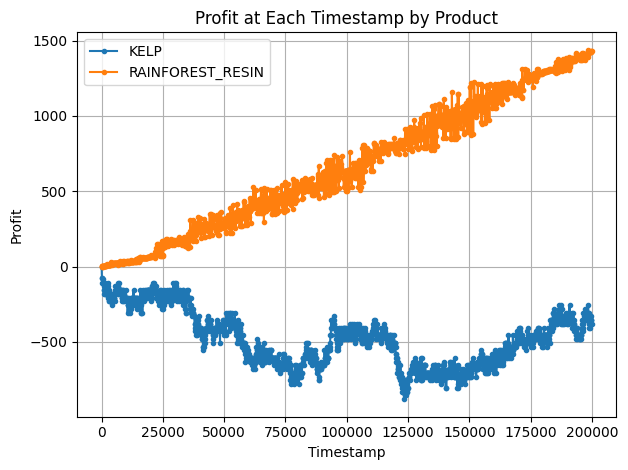

In [4]:
# Re-import necessary packages after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import re

# Reload the log file
log_path = "/Users/kgawande/Documents/Projects/aura-farmers/backtests/2025-04-08_09-24-20.log"
with open(log_path, "r") as f:
    lines = f.readlines()

# Extract timestamp, product, and profit
data = []
pattern = re.compile(r"RAINFOREST_RESIN|KELP")
for line in lines:
    if pattern.search(line):
        parts = line.strip().split(";")
        if len(parts) > 12:
            product = parts[2]
            timestamp = int(parts[1])
            try:
                profit = float(parts[-1])
                data.append((timestamp, product, profit))
            except ValueError:
                continue

# Create DataFrame
df = pd.DataFrame(data, columns=["Timestamp", "Product", "Profit"])
df.sort_values("Timestamp", inplace=True)

# Group by Timestamp and Product, then take the latest profit per timestamp
profit_by_product = df.groupby(["Timestamp", "Product"]).last().reset_index()


# Plot profit per timestamp
fig, ax = plt.subplots()
for product_name, group in profit_by_product.groupby("Product"):
    ax.plot(group["Timestamp"], group["Profit"], label=product_name, marker='.')

ax.set_title("Profit at Each Timestamp by Product")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Profit")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Round 1 Past Code

In [2]:
# Set the path to your log file
log_path = "/Users/kgawande/Documents/Projects/aura-farmers/backtests/2025-04-09_02-09-06.log"

# Read the log file; assume the delimiter is a semicolon
# If your file doesn't have a header, you can provide one using the 'names' parameter.
df = pd.read_csv(log_path, delimiter=";")

# Filter to only include rows for SQUID_INK
df_squid = df[df["product"] == "SQUID_INK"]

# For debugging, print the extracted PnL and timestamp columns
print(df_squid[["timestamp", "profit_and_loss"]])

# Plot PnL vs. Timestamp for SQUID_INK
plt.plot(df_squid["timestamp"], df_squid["profit_and_loss"], marker='o', linestyle='-')
plt.title("PNL of SQUID_INK")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 150006, saw 17


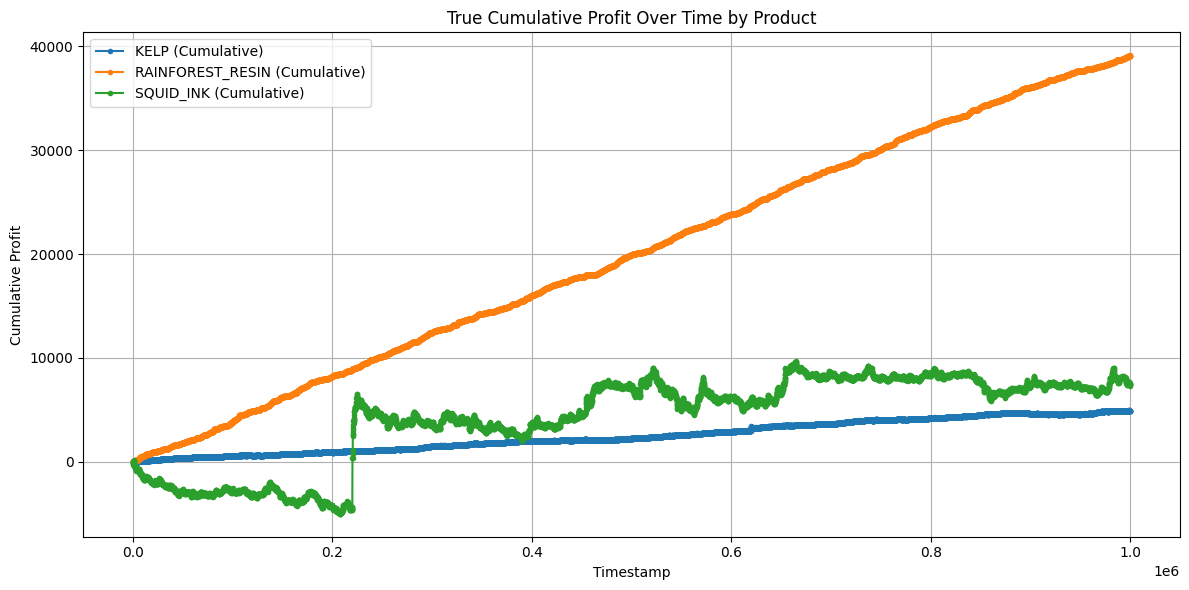

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the log file
log_path = "/Users/kgawande/Downloads/d5a69084-ba9d-4544-8acc-3507f0c93d70_final.log"
with open(log_path, "r") as f:
    lines = f.readlines()

# Extract timestamp, product, and profit
data = []
pattern = re.compile(r"KELP|RAINFOREST_RESIN|SQUID_INK")

for line in lines:
    if pattern.search(line):
        parts = line.strip().split(";")
        if len(parts) > 12:
            product = parts[2]
            timestamp = int(parts[1])
            try:
                profit = float(parts[-1])
                data.append((timestamp, product, profit))
            except ValueError:
                continue

# Create DataFrame
df = pd.DataFrame(data, columns=["Timestamp", "Product", "Profit"])
df.sort_values(["Product", "Timestamp"], inplace=True)

# Compute true cumulative profit across resets
cumulative_data = []
last_profit = {}

for row in df.itertuples():
    timestamp = row.Timestamp
    product = row.Product
    profit = row.Profit
    
    # Get last recorded profit for this product
    last = last_profit.get(product, 0)
    
    # Calculate profit delta
    delta = profit - last
    # Update cumulative profit
    if cumulative_data and cumulative_data[-1][1] == product:
        cumulative = cumulative_data[-1][3] + delta
    else:
        cumulative = delta
    
    cumulative_data.append((timestamp, product, profit, cumulative))
    last_profit[product] = profit

# Final DataFrame
cum_df = pd.DataFrame(cumulative_data, columns=["Timestamp", "Product", "Profit", "Cumulative_Profit"])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for product, group in cum_df.groupby("Product"):
    ax.plot(group["Timestamp"], group["Cumulative_Profit"], label=f"{product} (Cumulative)", marker='.')

ax.set_title("True Cumulative Profit Over Time by Product")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Cumulative Profit")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


# AS4 R1 results


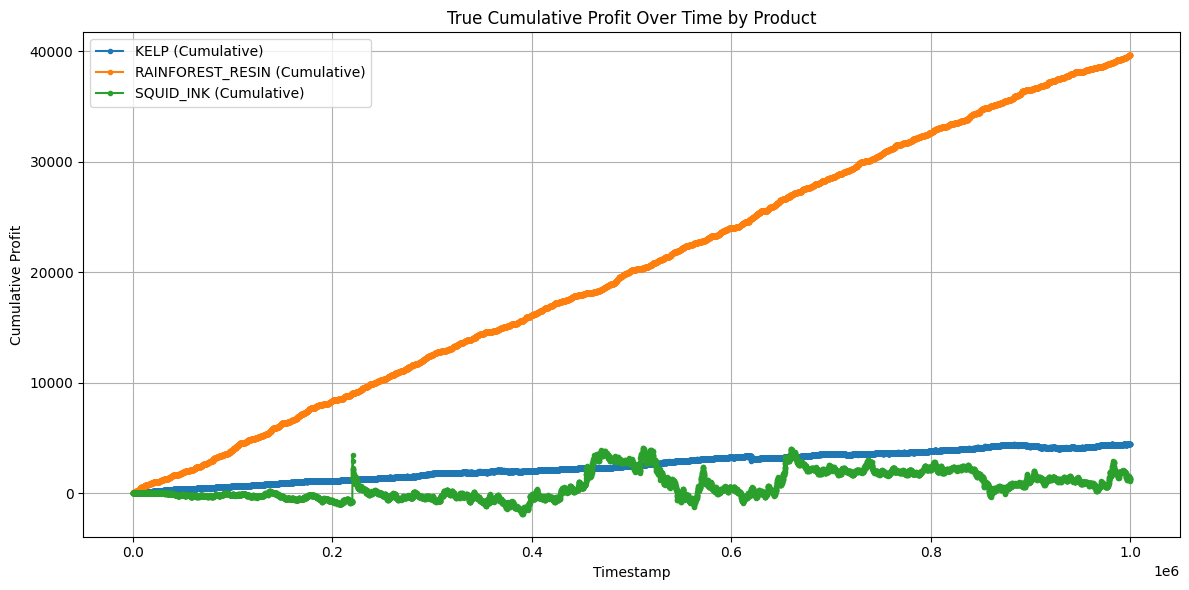

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the log file
log_path = "/Users/kgawande/Downloads/ebb3a8db-5a3d-40c8-8b92-57ccb0eb98ad_final.log"
with open(log_path, "r") as f:
    lines = f.readlines()

# Extract timestamp, product, and profit
data = []
pattern = re.compile(r"KELP|RAINFOREST_RESIN|SQUID_INK")

for line in lines:
    if pattern.search(line):
        parts = line.strip().split(";")
        if len(parts) > 12:
            product = parts[2]
            timestamp = int(parts[1])
            try:
                profit = float(parts[-1])
                data.append((timestamp, product, profit))
            except ValueError:
                continue

# Create DataFrame
df = pd.DataFrame(data, columns=["Timestamp", "Product", "Profit"])
df.sort_values(["Product", "Timestamp"], inplace=True)

# Compute true cumulative profit across resets
cumulative_data = []
last_profit = {}

for row in df.itertuples():
    timestamp = row.Timestamp
    product = row.Product
    profit = row.Profit
    
    # Get last recorded profit for this product
    last = last_profit.get(product, 0)
    
    # Calculate profit delta
    delta = profit - last
    # Update cumulative profit
    if cumulative_data and cumulative_data[-1][1] == product:
        cumulative = cumulative_data[-1][3] + delta
    else:
        cumulative = delta
    
    cumulative_data.append((timestamp, product, profit, cumulative))
    last_profit[product] = profit

# Final DataFrame
cum_df = pd.DataFrame(cumulative_data, columns=["Timestamp", "Product", "Profit", "Cumulative_Profit"])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for product, group in cum_df.groupby("Product"):
    ax.plot(group["Timestamp"], group["Cumulative_Profit"], label=f"{product} (Cumulative)", marker='.')

ax.set_title("True Cumulative Profit Over Time by Product")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Cumulative Profit")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


# R2 Results

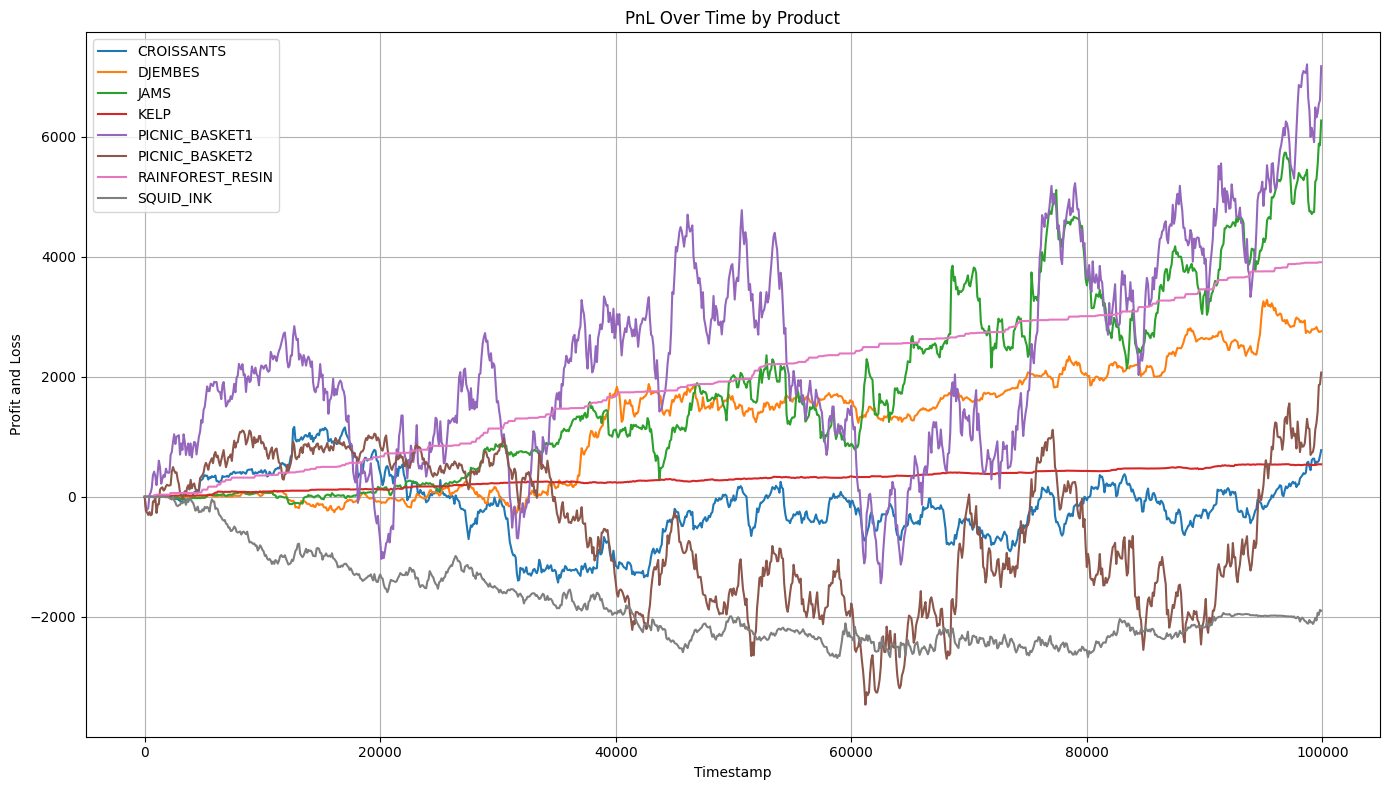

Final Profit and Loss at Last Timestamp:
CROISSANTS: Timestamp = 99900, Profit = 778.00
DJEMBES: Timestamp = 99900, Profit = 2757.56
JAMS: Timestamp = 99900, Profit = 6268.00
KELP: Timestamp = 99900, Profit = 541.92
PICNIC_BASKET1: Timestamp = 99900, Profit = 7171.75
PICNIC_BASKET2: Timestamp = 99900, Profit = 2070.00
RAINFOREST_RESIN: Timestamp = 99900, Profit = 3907.00
SQUID_INK: Timestamp = 99900, Profit = -1896.50

Total Profit Across All Products: 21597.74


/var/folders/hv/2vlnl85n369fmvwhjtsktpsh0000gn/T/ipykernel_27664/249567071.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_pnl = grouped.apply(lambda g: g[g['timestamp'] == g['timestamp'].max()][['timestamp', 'profit_and_loss']].iloc[-1])


In [2]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (adjust the path if running locally)
file_path = "/Users/kgawande/Downloads/affa9bec-5200-42e2-816b-53596d7ec1c5.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter=';')

# Ensure the key columns are in the right format
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
df['profit_and_loss'] = pd.to_numeric(df['profit_and_loss'], errors='coerce')

# Drop rows with missing essential data
df.dropna(subset=['timestamp', 'product', 'profit_and_loss'], inplace=True)

# Group by product
grouped = df.groupby('product')

# Plot PnL over time for each product
plt.figure(figsize=(14, 8))
for name, group in grouped:
    plt.plot(group['timestamp'], group['profit_and_loss'], label=name)
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.title("PnL Over Time by Product")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Get the final profit at the last timestamp for each product
final_pnl = grouped.apply(lambda g: g[g['timestamp'] == g['timestamp'].max()][['timestamp', 'profit_and_loss']].iloc[-1])

# Print the final results
print("Final Profit and Loss at Last Timestamp:")
total_profit = 0
for product, row in final_pnl.iterrows():
    profit = row['profit_and_loss']
    total_profit += profit
    print(f"{product}: Timestamp = {int(row['timestamp'])}, Profit = {profit:.2f}")

# Print total profit
print(f"\nTotal Profit Across All Products: {total_profit:.2f}")
